In [3]:
import numpy as np
import scipy as sp
import seaborn as sns

In [4]:
from scipy.stats import poisson

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

## Call Center Example

Suppose we have recorded the number of arrivals \alert{in each hour} for 30 hours. The dataset is modeled as a realization of a random $i.i.d.$ sample $(X_1,X_2,\ldots,X_n)$ of size $n=30\,$from a $Pois(\mu)$ distribution.


### Estimation Task:


$$
p_0\text{ }=P(X=0),\,X\sim Pois(\mu)
$$

using the following two possible estimators:

$$
S=\frac{\text{number of }X_i\text{ equal to zero}}{n} \quad \text{and} \quad T=e^{-\bar{X}_n},\,\bar{x}_n=\frac{1}{n}\sum_{i=1}^n X_i
$$

* Estimator S can only attain the values $0,1/30,2/30,\ldots,1$
* Estimator $T$ only attain the values 1, $exp(-1/30),exp(-2/30),\ldots$

### Simulation settings

* To get an idea of the behavior of both estimators, we pretend we know $\mu$ and we simulate the estimation processs.
* Setting $p_0=e^{-\mu}=0.1$ we sample $(x_1,\ldots,x_{30})$ from $X\sim Pois(\mu)$ with $\mu=\ln 10 \approx 2.3$ and compute realization $s$ and $t$ for estimators $S$ and $T$. We repeat this 1000 times, so that we have 1000 values for each estimator of $p_0=0.10$.



In [6]:
n = 30
nsim = 1000

In [7]:
mu = np.log(10)
print('mu = {0:.2f}'.format(mu))
print('p_0 = e^(-mu) = {0:.2f}'.format( np.exp(-mu)))

mu = 2.30
p_0 = e^(-mu) = 0.10


In [8]:
sample = sp.stats.poisson.rvs(mu=mu, size=n)
print(sample)

[1 3 3 5 3 3 9 3 1 1 3 2 4 1 2 5 3 2 3 2 3 4 1 3 5 0 2 5 1 2]


In [9]:
(sample == 0).sum()

1

In [10]:
sim = sp.stats.poisson.rvs(mu=mu, size=(nsim,n))
print(sim)

[[2 2 2 ..., 0 0 1]
 [1 3 2 ..., 0 3 0]
 [3 6 2 ..., 3 3 1]
 ..., 
 [2 3 1 ..., 1 2 0]
 [1 2 1 ..., 0 2 4]
 [0 1 1 ..., 1 3 2]]


In [12]:
S = ( (sim == 0).sum(axis=1) ).astype(float) / n
#print(S)

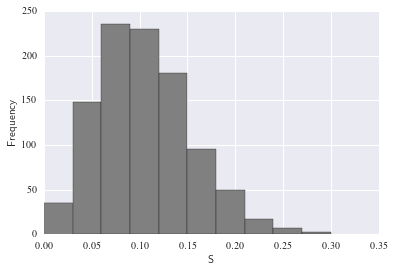

In [42]:
plt.hist(S, color='gray')
plt.axis([0, 0.35, 0, 250])
plt.xlabel('S')
plt.ylabel('Frequency')

In [43]:
T = np.exp(-1.0* sim.mean(axis=1) )
#print(T)

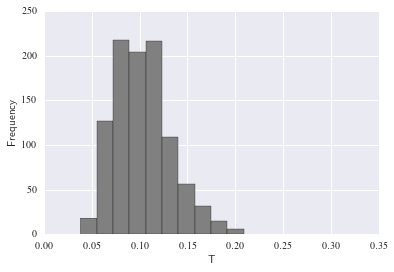

In [44]:
plt.hist(T, color='gray')
plt.axis([0, 0.35, 0, 250])
plt.xlabel('T')
plt.ylabel('Frequency')

In [16]:
X_bar = sim.mean(axis=1)

[0, 5, 0, 300]

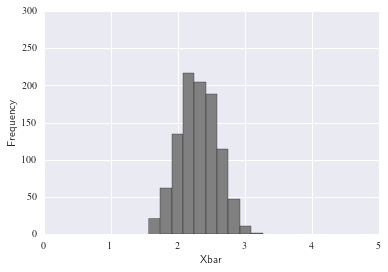

In [18]:
plt.hist(X_bar, color='gray')
plt.xlabel('Xbar')
plt.ylabel('Frequency')
plt.axis([0, 5, 0, 300])

In [19]:
S_n_squared = (((sim.T - X_bar).T)**2).sum(axis=1) / (n - 1)

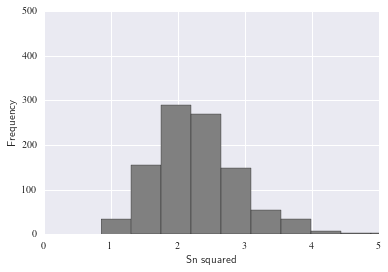

In [45]:
plt.hist(S_n_squared, color='gray')
plt.axis([0, 5, 0, 500])
plt.xlabel('Sn squared')
plt.ylabel('Frequency')

In [22]:
((T - np.exp(-1*mu))**2).mean()

0.0008710804319921031

In [23]:
def generate_simulation(mu):
    return sp.stats.poisson.rvs(mu=mu, size=(nsim,n))

In [24]:
def compute_T(sim):
    return np.exp(-1.0*sim.mean(axis=1))

In [25]:
def mse(estimator, parameter):
    return ((estimator - parameter)**2).mean()

In [26]:
def compute_parameter(mu):
    return np.exp(-1.0*mu)

In [27]:
mu_array = np.linspace(0.1, 5, 21)
print(mu_array)

[ 0.1    0.345  0.59   0.835  1.08   1.325  1.57   1.815  2.06   2.305
  2.55   2.795  3.04   3.285  3.53   3.775  4.02   4.265  4.51   4.755  5.   ]


In [30]:
#[generate_simulation(mu).mean(axis=1) for mu in mu_array]

In [31]:
T = np.exp(-1.0* sim.mean(axis=1) )

In [32]:
simulations = np.array( [generate_simulation(mu) for mu in mu_array])

In [33]:
parameters = compute_parameter(mu_array)

In [34]:
T_estimator = compute_T(simulations)

In [35]:
print(T_estimator.shape)

(21, 30)


In [36]:
print(parameters.shape)

(21,)


In [37]:
print(T_estimator[0])

[ 0.90212697  0.8976276   0.91028276  0.90937293  0.90302955  0.91301771
  0.90032452  0.8976276   0.89583414  0.89493875  0.91943126  0.90846402
  0.90212697  0.89852567  0.9012253   0.90574271  0.89047522  0.89852567
  0.9111935   0.89942465  0.89404426  0.89583414  0.90393303  0.89942465
  0.92127196  0.91576088  0.90393303  0.89404426  0.90302955  0.89225796]


In [38]:
print(parameters[0])

0.904837418036


In [39]:
print(((T_estimator.T - parameters)**2).mean())

4.2682158535e-05


In [40]:
MSE_T = (((T_estimator.T - parameters).T)**2).mean(axis=1)

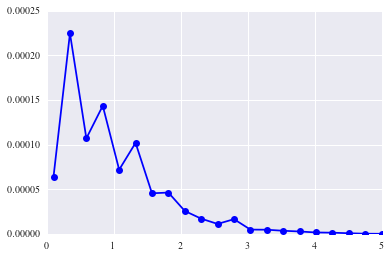

In [41]:
plt.plot(mu_array, MSE_T, 'bo')
plt.plot(mu_array, MSE_T, 'b-')